<a href="https://colab.research.google.com/github/caleboutlar/caleb.outlar/blob/master/NSLS_DataAnal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import glob as gb
import h5py as hp5


In [8]:
h5file ="/content/bto_pdf_data.hdf5"

In [9]:
f = hp5.File(h5file, 'r')

In [12]:
list(f.keys())[0]

'00000'

In [16]:
list(f['00000'].attrs)

['uid', 'temperature', 'time']

In [19]:
f['00001'].attrs['temperature']

299.91

In [20]:
f['00001'].attrs['time']

25.55989146232605

In [21]:
f['00001'].attrs['uid']

'463c481c-420b-42e2-a58a-50072a6a4656'

In [22]:
f['00001'].attrs['time']

25.55989146232605

In [95]:
temp_list = []
time_list = []
for key in f.keys():
    temp_list.append(float(f[key].attrs['temperature']))
    time_list.append(float(f[key].attrs['time']))

In [39]:
print(temp_list)

[300.69, 299.91, 298.44, 297.44, 296.45, 295.44, 294.51, 293.46, 292.41, 291.44, 290.44, 289.44, 288.44, 287.44, 286.44, 285.46, 284.47, 283.46, 282.47, 281.48, 280.5, 279.47, 278.47, 277.48, 276.47, 275.51, 274.49, 273.5, 272.49, 271.49, 270.52, 269.54, 268.43, 267.5, 266.43, 265.52, 264.43, 263.54, 262.54, 261.43, 260.45, 259.46, 258.45, 257.45, 256.48, 255.46, 254.48, 253.48, 252.46, 251.49, 250.47, 249.5, 248.5, 247.51, 246.52, 245.52, 244.49, 243.51, 242.53, 241.52, 240.51, 239.52, 238.48, 237.52, 236.56, 235.45, 234.53, 233.57, 232.57, 231.58, 230.53, 229.57, 228.48, 227.57, 226.48, 225.57, 224.52, 223.51, 222.59, 221.6, 220.55, 219.53, 218.61, 217.53, 216.53, 215.55, 214.56, 213.56, 212.55, 211.58, 210.58, 209.58, 208.6, 207.59, 206.61, 205.6, 204.56, 203.62, 202.63, 201.61, 200.62, 199.59, 198.64, 197.64, 196.62, 195.62, 194.62, 193.64, 192.65, 191.65, 190.61, 189.6, 188.65, 187.64, 186.69, 185.67, 184.62, 183.69, 182.61, 181.68, 180.68, 179.67, 178.69, 177.67, 176.7, 175.65, 1

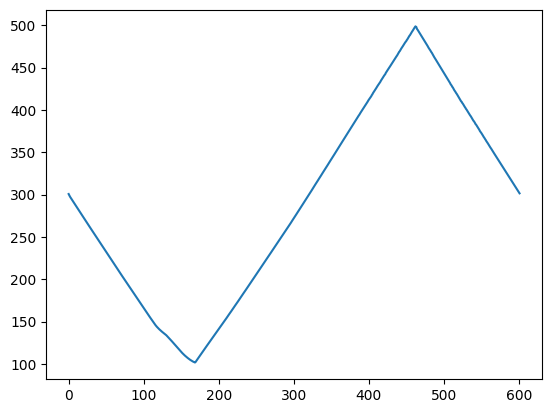

In [96]:
plt.figure()
plt.plot(np.array(time_list)/60,temp_list);

In [92]:

time_list = []
for key in f.keys():
    time_list.append(float(f['00001'].attrs['time']))




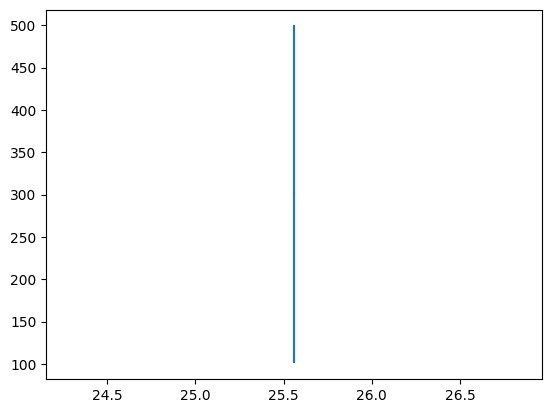

In [93]:
plt.figure()
plt.plot(time_list, temp_list);

In [50]:
tth_list = []
i_list = []
for key in f.keys():
    tth_list.append(np.array(f[key]['tth']))
    i_list.append(np.array(f[key]['Intensity']))

tth_list = np.array(tth_list)
i_list = np.array(i_list)

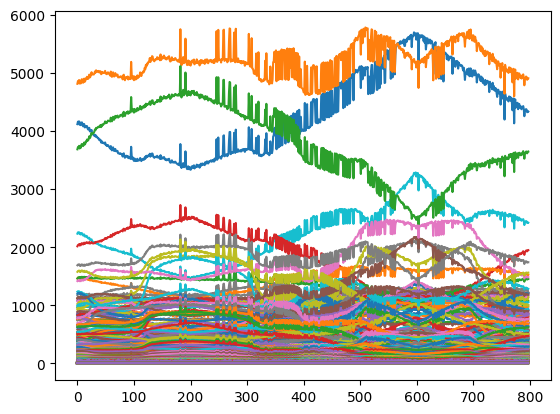

In [51]:
plt.figure()
plt.plot(i_list);

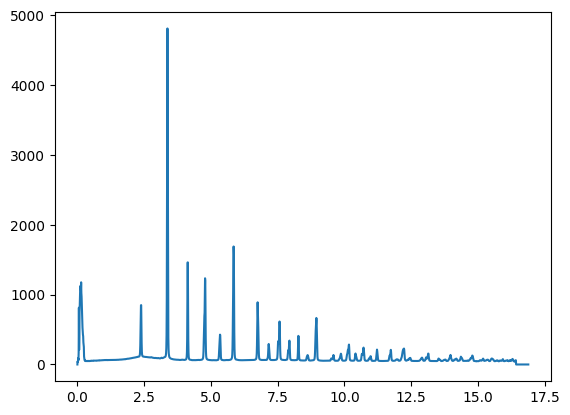

In [53]:
plt.figure()
plt.plot(tth_list[0], i_list[0]);

In [57]:
mydf = pd.DataFrame(i_list,columns=tth_list[0],index=temp_list).T

In [58]:
print(mydf)

              300.69     299.91     298.44     297.44     296.45     295.44  \
0.007036    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
0.012625   42.800001  25.800001  33.200001  22.200001  30.800001  44.400001   
0.021043   33.500002  33.500002  46.125004  33.750002  31.125002  35.500002   
0.029461   46.615393  41.461546  46.923085  39.923083  43.538469  44.230777   
0.037880   90.083367  94.250034  87.333364  88.333368  85.500033  90.916700   
...              ...        ...        ...        ...        ...        ...   
16.847650   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
16.855361   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
16.863071   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
16.870781   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
16.878489   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

              294.51     293.46     292.41     291.

(7.0, 8.0)

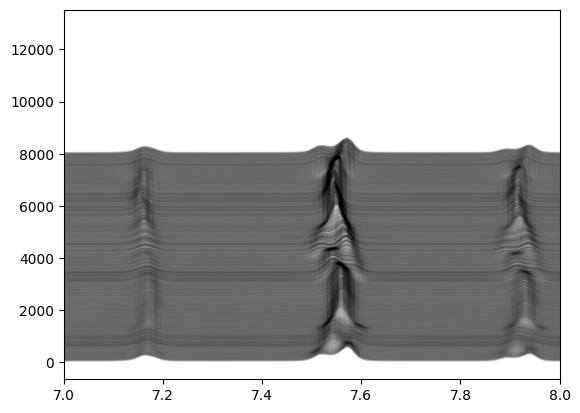

In [70]:
plt.Figure()
for i, col in enumerate(mydf.columns):
 plt.plot(mydf.loc[:,col]+i*10, color='k',alpha=.1);

plt.xlim(7,8)

In [71]:
import scipy as sp

In [75]:
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans, AgglomerativeClustering

In [81]:
connectivity = kneighbors_graph(mydf.loc[:,:].T, n_neighbors=10, include_self= False)

In [84]:
ward = AgglomerativeClustering(
    n_clusters = 4,
    connectivity = connectivity,
    linkage = "ward"
)

ward.fit(mydf.loc[:,:].T)

AgglomerativeClustering(connectivity=<798x798 sparse matrix of type '<class 'numpy.float64'>'
	with 7980 stored elements in Compressed Sparse Row format>,
                        n_clusters=4)

In [85]:
lables = ward.labels_

(7.0, 8.0)

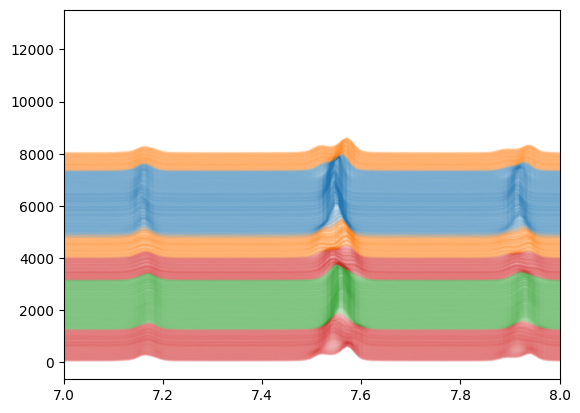

In [87]:
plt.Figure()
for i, col in enumerate(mydf.columns):
 my_color = 'C' + str(lables[i])
 plt.plot(mydf.loc[:,col]+i*10, my_color,alpha=.1);

plt.xlim(7,8)

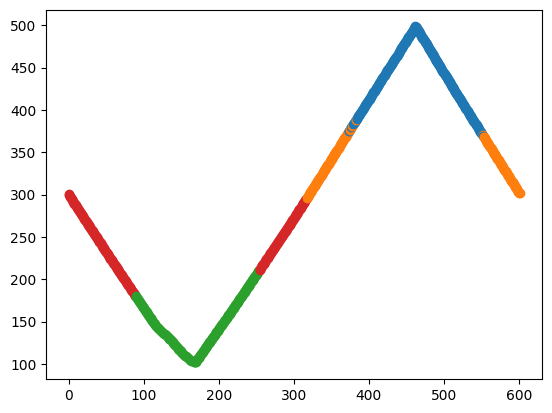

In [97]:
plt.Figure()
for i, temp in enumerate(temp_list):
  my_color = 'C' + str(lables[i])
  my_time = time_list[i]/60
  plt.scatter(my_time, temp, color=my_color);
